In [2]:
import numpy as np
import pandas as pd
import re

with open('data_1.csv', 'r') as f:
    Data = f.read().splitlines()
    
two_theta = np.array([float(re.split(r',', x)[0]) for x in Data[1:]])
I1 = np.array([float(re.split(r',', x)[1]) for x in Data[1:]])
I2 = np.array([float(re.split(r',', x)[2]) for x in Data[1:]])
I3 = np.array([float(re.split(r',', x)[3]) for x in Data[1:]])

I1 = I1/np.max(I1)
I1[I1< 0 ] = 0

I2 = I2/np.max(I2)
I2[I2< 0 ] = 0

I3 = I3/np.max(I3)
I2[I2< 0 ] = 0


real_two_theta = np.load('two_theta.npy')


I1_real = np.interp(real_two_theta, two_theta, I1 )
I2_real = np.interp(real_two_theta, two_theta, I2 )
I3_real = np.interp(real_two_theta, two_theta, I3 )

y_testing = np.array([I1_real, I2_real, I3_real])
np.savetxt('experimental_test_points.npy', y_testing)
print (y_testing.shape)

real_two_theta

(3, 3779)


array([1.000000e-03, 1.100000e-02, 2.100000e-02, ..., 3.775774e+01,
       3.776774e+01, 3.777774e+01])

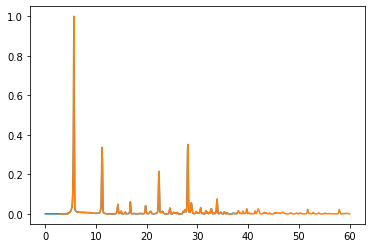

In [3]:
import matplotlib.pyplot as plt
plt.plot(real_two_theta, I1_real)
plt.plot(two_theta, I1)